#### Insert ones for the labels of the positive target

* Implement code to update the labels $y^{\langle t \rangle}$, assuming you just inserted an "activate" audio clip.
* In the code below, `y` is a `(1,1375)` dimensional vector, since $T_y = 1375$. 
* If the "activate" audio clip ends at time step $t$, then set $y^{\langle t+1 \rangle} = 1$ and also set the next 49 additional consecutive values to 1.
    * Notice that if the target word appears near the end of the entire audio clip, there may not be 50 additional time steps to set to 1.
    * Make sure you don't run off the end of the array and try to update `y[0][1375]`, since the valid indices are `y[0][0]` through `y[0][1374]` because $T_y = 1375$. 
    * So if "activate" ends at step 1370, you would get only set `y[0][1371] = y[0][1372] = y[0][1373] = y[0][1374] = 1`

**Exercise**: 
Implement `insert_ones()`. 
* You can use a for loop. 
* If you want to use Python's array slicing operations, you can do so as well.
* If a segment ends at `segment_end_ms` (using a 10000 step discretization),
    * To convert it to the indexing for the outputs $y$ (using a $1375$ step discretization), we will use this formula:  
```
    segment_end_y = int(segment_end_ms * Ty / 10000.0)
```

In [0]:
import numpy as np


In [0]:
s="20200528270 204787 7 20200528269 204794 4 20200528268 204780 0 20200528267 204777 7 20200528266 204792 2 20200528265 204770 0 20200528264 204759 9 20200528263 204755 5 20200528262 204743 3 20200528261 204734 4 20200528260 204722 2 20200528259 204726 6 20200528258 204741 1 20200528257 204730 0 20200528256 204745 5 20200528255 204751 1 20200528254 204772 2 20200528253 204786 6 20200528252 204783 3 20200528251 204774 4 20200528250 204770 0 20200528249 204750 0 20200528248 204752 2 20200528247 204753 3 20200528246 204751 1 20200528245 204767 7 20200528244 204769 9 20200528243 204757 7 20200528242 204744 4 20200528241 204731 1 20200528240 204718 8 20200528239 204719 9 20200528238 204730 0 20200528237 204710 0 20200528236 204731 1 20200528235 204756 6 20200528234 204745 5 20200528233 204749 9 20200528232 204775 5 20200528231 204758 8 20200528230 204753 3 20200528229 204722 2 20200528228 204734 4 20200528227 204732 2 20200528226 204721 1 20200528225 204702 2 20200528224 204699 9 20200528223 204692 2 20200528222 204696 6 20200528221 204712 2 20200528220 204701 1 20200528219 204696 6 20200528218 204694 4 20200528217 204685 5 20200528216 204694 4 20200528215 204694 4 20200528214 204695 5 20200528213 204697 7 20200528212 204700 0 20200528211 204724 4 20200528210 204709 9 20200528209 204712 2 20200528208 204729 9 20200528207 204704 4 20200528206 204704 4 20200528205 204693 3 20200528204 204693 3 20200528203 204705 5 20200528202 204716 6 20200528201 204713 3 20200528200 204696 6 20200528199 204701 1 20200528198 204719 9 20200528197 204707 7 20200528196 204721 1 20200528195 204711 1 20200528194 204738 8 20200528193 204738 8 20200528192 204731 1 20200528191 204740 0 20200528190 204727 7 20200528189 204748 8 20200528188 204757 7 20200528187 204779 9 20200528186 204797 7 20200528185 204808 8 20200528184 204830 0 20200528183 204832 2 20200528182 204834 4 20200528181 204824 4 20200528180 204843 3 20200528179 204868 8 20200528178 204844 4 20200528177 204831 1 20200528176 204843 3 20200528175 204867 7 20200528174 204854 4 20200528173 204847 7 20200528172 204841 1 20200528171 204848 8 20200528170 204874 4 20200528169 204854 4 20200528168 204836 6 20200528167 204822 2 20200528166 204834 4 20200528165 204833 3 20200528164 204824 4 20200528163 204799 9 20200528162 204797 7 20200528161 204792 2 20200528160 204812 2 20200528159 204807 7 20200528158 204823 3 20200528157 204847 7 20200528156 204842 2 20200528155 204821 1 20200528154 204827 7 20200528153 204831 1 20200528152 204856 6 20200528151 204863 3 20200528150 204875 5 20200528149 204887 7 20200528148 204887 7 20200528147 204887 7 20200528146 204868 8 20200528145 204877 7 20200528144 204869 9 20200528143 204854 4 20200528142 204846 6 20200528141 204862 2 20200528140 204872 2 20200528139 204874 4 20200528138 204894 4 20200528137 204886 6 20200528136 204898 8 20200528135 204883 3 20200528134 204884 4 20200528133 204903 3 20200528132 204889 9 20200528131 204897 7 20200528130 204883 3 20200528129 204873 3 20200528128 204889 9 20200528127 204861 1 20200528126 204851 1 20200528125 204869 9 20200528124 204866 6 20200528123 204855 5 20200528122 204843 3 20200528121 204844 4 20200528120 204817 7 20200528119 204816 6 20200528118 204793 3 20200528117 204814 4 20200528116 204836 6 20200528115 204822 2 20200528114 204808 8 20200528113 204820 0 20200528112 204812 2 20200528111 204815 5 20200528110 204839 9 20200528109 204854 4 20200528108 204863 3 20200528107 204859 9 20200528106 204868 8 20200528105 204887 7 20200528104 204905 5 20200528103 204916 6 20200528102 204929 9 20200528101 204929 9 20200528100 204940 0 20200528099 204947 7 20200528098 204976 6 20200528097 204994 4 20200528096 204983 3 20200528095 204996 6 20200528094 204986 6 20200528093 205006 6 20200528092 205003 3 20200528091 204987 7 20200528090 205007 7 20200528089 205006 6 20200528088 205022 2 20200528087 205012 2 20200528086 204990 0 20200528085 204997 7 20200528084 204976 6 20200528083 204984 4 20200528082 204962 2 20200528081 204972 2 20200528080 204985 5 20200528079 204988 8 20200528078 204988 8 20200528077 204995 5 20200528076 205027 7 20200528075 205034 4 20200528074 205032 2 20200528073 205030 0 20200528072 205059 9 20200528071 205059 9 20200528070 205068 8 20200528069 205075 5 20200528068 205068 8 20200528067 205041 1 20200528066 205040 0 20200528065 205027 7 20200528064 205015 5 20200528063 204998 8 20200528062 204990 0 20200528061 204989 9 20200528060 204981 1 20200528059 204979 9 20200528058 204979 9 20200528057 204971 1 20200528056 204962 2 20200528055 204977 7 20200528054 204984 4 20200528053 204991 1 20200528052 205005 5 20200528051 204999 9 20200528050 205010 0 20200528049 205013 3 20200528048 205016 6 20200528047 205011 1 20200528046 205017 7 20200528045 205040 0 20200528044 205066 6 20200528043 205055 5 20200528042 205054 4 20200528041 205069 9 20200528040 205077 7 20200528039 205083 3 20200528038 205067 7 20200528037 205045 5 20200528036 205058 8 20200528035 205061 1 20200528034 205042 2 20200528033 205039 9 20200528032 205018 8 20200528031 205031 1 20200528030 205055 5 20200528029 205069 9 20200528028 205096 6 20200528027 205114 4 20200528026 205133 3 20200528025 205153 3 20200528024 205164 4 20200528023 205146 6 20200528022 205153 3 20200528021 205165 5 20200528020 205146 6 20200528019 205148 8 20200528018 205147 7 20200528017 205158 8 20200528016 205150 0 20200528015 205156 6 20200528014 205151 1 20200528013 205176 6 20200528012 205178 8 20200528011 205175 5 20200528010 205170 0 20200528009 205183 3 20200528008 205183 3 20200528007 205174 4 20200528006 205200 0 20200528005 205200 0 20200528004 205184 4 20200528003 205197 7 20200528002 205195 5 20200528001 205175 5 20200527480 205191 1 20200527479 205180 0 20200527478 205200 0 20200527477 205204 4 20200527476 205222 2 20200527475 205214 4 20200527474 205241 1 20200527473 205240 0 20200527472 205261 1 20200527471 205289 9 20200527470 205287 7 20200527469 205318 8 20200527468 205333 3 20200527467 205335 5 20200527466 205336 6 20200527465 205317 7 20200527464 205290 0 20200527463 205311 1 20200527462 205294 4 20200527461 205272 2 20200527460 205295 5 20200527459 205301 1 20200527458 205290 0 20200527457 205277 7 20200527456 205286 6 20200527455 205263 3 20200527454 205277 7 20200527453 205268 8 20200527452 205280 0 20200527451 205262 2 20200527450 205264 4 20200527449 205248 8 20200527448 205234 4 20200527447 205238 8 20200527446 205240 0 20200527445 205210 0 20200527444 205220 0 20200527443 205237 7 20200527442 205242 2 20200527441 205279 9 20200527440 205276 6 20200527439 205253 3 20200527438 205276 6 20200527437 205263 3 20200527436 205282 2 20200527435 205293 3 20200527434 205324 4 20200527433 205339 9 20200527432 205355 5 20200527431 205369 9 20200527430 205370 0 20200527429 205374 4 20200527428 205376 6 20200527427 205386 6 20200527426 205392 2 20200527425 205399 9 20200527424 205417 7 20200527423 205402 2 20200527422 205374 4 20200527421 205387 7 20200527420 205415 5 20200527419 205410 0 20200527418 205413 3 20200527417 205408 8 20200527416 205400 0 20200527415 205403 3 20200527414 205411 1 20200527413 205429 9 20200527412 205443 3 20200527411 205429 9 20200527410 205435 5 20200527409 205445 5 20200527408 205415 5 20200527407 205410 0 20200527406 205416 6 20200527405 205396 6 20200527404 205381 1 20200527403 205381 1 20200527402 205367 7 20200527401 205354 4 20200527400 205344 4 20200527399 205352 2 20200527398 205323 3 20200527397 205300 0 20200527396 205319 9 20200527395 205323 3 20200527394 205335 5 20200527393 205338 8 20200527392 205348 8 20200527391 205322 2 20200527390 205335 5 20200527389 205330 0 20200527388 205318 8 20200527387 205331 1 20200527386 205336 6 20200527385 205346 6 20200527384 205334 4 20200527383 205334 4 20200527382 205322 2 20200527381 205333 3 20200527380 205346 6 20200527379 205328 8 20200527378 205321 1 20200527377 205337 7 20200527376 205366 6 20200527375 205376 6 20200527374 205409 9 20200527373 205423 3 20200527372 205430 0 20200527371 205409 9 20200527370 205405 5 20200527369 205404 4 20200527368 205399 9 20200527367 205397 7 20200527366 205409 9 20200527365 205409 9 20200527364 205413 3 20200527363 205413 3 20200527362 205418 8 20200527361 205429 9 20200527360 205448 8 20200527359 205450 0 20200527358 205441 1 20200527357 205451 1 20200527356 205452 2 20200527355 205450 0 20200527354 205428 8 20200527353 205448 8 20200527352 205451 1 20200527351 205453 3 20200527350 205458 8 20200527349 205437 7 20200527348 205434 4 20200527347 205437 7 20200527346 205426 6 20200527345 205430 0 20200527344 205400 0 20200527343 205409 9 20200527342 205395 5 20200527341 205395 5 20200527340 205381 1 20200527339 205399 9 20200527338 205405 5 20200527337 205386 6 20200527336 205381 1 20200527335 205385 5 20200527334 205371 1 20200527333 205397 7 20200527332 205380 0 20200527331 205379 9 20200527330 205398 8 20200527329 205390 0 20200527328 205399 9 20200527327 205415 5 20200527326 205418 8 20200527325 205411 1 20200527324 205419 9 20200527323 205403 3 20200527322 205375 5 20200527321 205390 0 20200527320 205380 0 20200527319 205385 5 20200527318 205396 6 20200527317 205388 8 20200527316 205379 9 20200527315 205389 9 20200527314 205373 3 20200527313 205362 2 20200527312 205387 7 20200527311 205382 2 20200527310 205380 0 20200527309 205370 0 20200527308 205344 4 20200527307 205353 3 20200527306 205360 0 20200527305 205358 8 20200527304 205366 6 20200527303 205379 9 20200527302 205350 0 20200527301 205362 2 20200527300 205370 0 20200527299 205365 5 20200527298 205371 1 20200527297 205381 1 20200527296 205359 9 20200527295 205359 9 20200527294 205349 9 20200527293 205350 0 20200527292 205378 8 20200527291 205378 8 20200527290 205383 3 20200527289 205396 6 20200527288 205378 8 20200527287 205362 2 20200527286 205379 9 20200527285 205384 4 20200527284 205414 4 20200527283 205391 1 20200527282 205386 6 20200527281 205394 4 20200527280 205390 0 20200527279 205404 4 20200527278 205391 1 20200527277 205405 5 20200527276 205379 9 20200527275 205400 0 20200527274 205387 7 20200527273 205377 7 20200527272 205353 3 20200527271 205331 1 20200527270 205328 8 20200527269 205332 2 20200527268 205325 5 20200527267 205311 1 20200527266 205294 4 20200527265 205315 5 20200527264 205324 4 20200527263 205331 1 20200527262 205358 8 20200527261 205365 5 20200527260 205377 7 20200527259 205387 7 20200527258 205419 9 20200527257 205437 7 20200527256 205425 5 20200527255 205424 4 20200527254 205433 3 20200527253 205413 3 20200527252 205434 4 20200527251 205405 5 20200527250 205389 9 20200527249 205386 6 20200527248 205378 8 20200527247 205404 4 20200527246 205405 5 20200527245 205394 4 20200527244 205404 4 20200527243 205410 0 20200527242 205427 7 20200527241 205444 4 20200527240 205444 4 20200527239 205444 4 20200527238 205425 5 20200527237 205423 3 20200527236 205416 6 20200527235 205423 3 20200527234 205424 4 20200527233 205414 4 20200527232 205415 5 20200527231 205425 5 20200527230 205406 6 20200527229 205425 5 20200527228 205438 8 20200527227 205420 0 20200527226 205390 0 20200527225 205388 8 20200527224 205388 8 20200527223 205375 5 20200527222 205392 2 20200527221 205388 8 20200527220 205367 7 20200527219 205375 5 20200527218 205355 5 20200527217 205339 9 20200527216 205347 7 20200527215 205326 6 20200527214 205339 9 20200527213 205333 3 20200527212 205369 9 20200527211 205360 0 20200527210 205364 4 20200527209 205366 6 20200527208 205344 4 20200527207 205358 8 20200527206 205359 9 20200527205 205333 3 20200527204 205351 1 20200527203 205357 7 20200527202 205358 8 20200527201 205372 2 20200527200 205356 6 20200527199 205345 5 20200527198 205339 9 20200527197 205345 5 20200527196 205338 8 20200527195 205333 3 20200527194 205332 2 20200527193 205333 3 20200527192 205327 7 20200527191 205324 4 20200527190 205331 1 20200527189 205341 1 20200527188 205354 4 20200527187 205368 8 20200527186 205365 5 20200527185 205353 3 20200527184 205345 5 20200527183 205345 5 20200527182 205350 0 20200527181 205349 9 20200527180 205347 7 20200527179 205369 9 20200527178 205366 6 20200527177 205347 7 20200527176 205333 3 20200527175 205325 5 20200527174 205336 6 20200527173 205318 8 20200527172 205304 4 20200527171 205306 6 20200527170 205303 3 20200527169 205303 3 20200527168 205315 5 20200527167 205335 5 20200527166 205328 8 20200527165 205339 9 20200527164 205331 1 20200527163 205329 9 20200527162 205351 1 20200527161 205364 4 20200527160 205374 4 20200527159 205378 8 20200527158 205387 7 20200527157 205383 3 20200527156 205360 0 20200527155 205379 9 20200527154 205397 7 20200527153 205376 6 20200527152 205372 2 20200527151 205382 2 20200527150 205381 1 20200527149 205396 6 20200527148 205378 8 20200527147 205376 6 20200527146 205379 9 20200527145 205377 7 20200527144 205384 4 20200527143 205373 3 20200527142 205378 8 20200527141 205360 0 20200527140 205359 9 20200527139 205374 4 20200527138 205343 3 20200527137 205313 3 20200527136 205307 7 20200527135 205309 9 20200527134 205328 8 20200527133 205333 3 20200527132 205353 3 20200527131 205364 4 20200527130 205388 8 20200527129 205370 0 20200527128 205382 2 20200527127 205369 9 20200527126 205362 2 20200527125 205389 9 20200527124 205405 5 20200527123 205387 7 20200527122 205375 5 20200527121 205390 0 20200527120 205405 5 20200527119 205409 9 20200527118 205391 1 20200527117 205384 4 20200527116 205393 3 20200527115 205370 0 20200527114 205345 5 20200527113 205320 0 20200527112 205321 1 20200527111 205332 2 20200527110 205359 9 20200527109 205363 3 20200527108 205365 5 20200527107 205366 6 20200527106 205366 6 20200527105 205387 7 20200527104 205366 6 20200527103 205347 7 20200527102 205368 8 20200527101 205386 6 20200527100 205366 6 20200527099 205378 8 20200527098 205373 3 20200527097 205382 2 20200527096 205378 8 20200527095 205378 8 20200527094 205404 4 20200527093 205412 2 20200527092 205437 7 20200527091 205434 4 20200527090 205443 3 20200527089 205449 9 20200527088 205461 1 20200527087 205471 1 20200527086 205451 1 20200527085 205445 5 20200527084 205432 2 20200527083 205415 5 20200527082 205432 2 20200527081 205448 8 20200527080 205457 7 20200527079 205431 1 20200527078 205427 7 20200527077 205428 8 20200527076 205431 1 20200527075 205400 0 20200527074 205419 9 20200527073 205427 7 20200527072 205416 6 20200527071 205446 6 20200527070 205447 7 20200527069 205438 8 20200527068 205443 3 20200527067 205428 8 20200527066 205431 1 20200527065 205437 7 20200527064 205432 2 20200527063 205448 8 20200527062 205459 9 20200527061 205475 5 20200527060 205465 5"
s=s.strip(" ")
lst=s.split(" ")
'''q=[]
for i in lst:
  if i=="Green":
    lst.remove(i)
  elif i=="Red":
    lst.remove(i)
  elif i=="Green,Violet":
    lst.remove(i)
  elif i=="Red,Violet":
    lst.remove(i)
  else:
    q.append(i)
lst.remove("Green")
lst.remove("Red")
lst.remove("Green,Violet")
lst.remove("Red,Violet")
'''
print(lst)
time=[]
price=[]
parity=[]
print(len(lst)/3)
for i in range(int(len(lst))):
  if i %3==0:
    time.append(int(lst[i]))
  elif i %3==1:
    price.append(int(lst[i]))
  elif i%3==2:
    parity.append(int(lst[i]))
for i in range(10):
  print(str(time[i])+" "+ str(price[i])+" "+str(parity[i]))

parity.reverse()
print(parity)
len(parity)

['20200528270', '204787', '7', '20200528269', '204794', '4', '20200528268', '204780', '0', '20200528267', '204777', '7', '20200528266', '204792', '2', '20200528265', '204770', '0', '20200528264', '204759', '9', '20200528263', '204755', '5', '20200528262', '204743', '3', '20200528261', '204734', '4', '20200528260', '204722', '2', '20200528259', '204726', '6', '20200528258', '204741', '1', '20200528257', '204730', '0', '20200528256', '204745', '5', '20200528255', '204751', '1', '20200528254', '204772', '2', '20200528253', '204786', '6', '20200528252', '204783', '3', '20200528251', '204774', '4', '20200528250', '204770', '0', '20200528249', '204750', '0', '20200528248', '204752', '2', '20200528247', '204753', '3', '20200528246', '204751', '1', '20200528245', '204767', '7', '20200528244', '204769', '9', '20200528243', '204757', '7', '20200528242', '204744', '4', '20200528241', '204731', '1', '20200528240', '204718', '8', '20200528239', '204719', '9', '20200528238', '204730', '0', '20200528

691

In [0]:
occ=[]
val=[]
x=input("Enter sequence")
print(x) 
for i in range(len(parity)):
  test=''.join([str(j) for j in parity[i:i+len(x)]])
  if (test==x):
      for k in range(len(x)):
        occ.append(k+i)
        val.append(parity[k+i])

print(occ)
len(parity)
print(val)

Enter sequence33
33
[72, 73, 77, 78, 109, 110, 193, 194, 303, 304, 428, 429, 445, 446, 549, 550, 624, 625]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


here
here
here
here
here
here
here
here
here


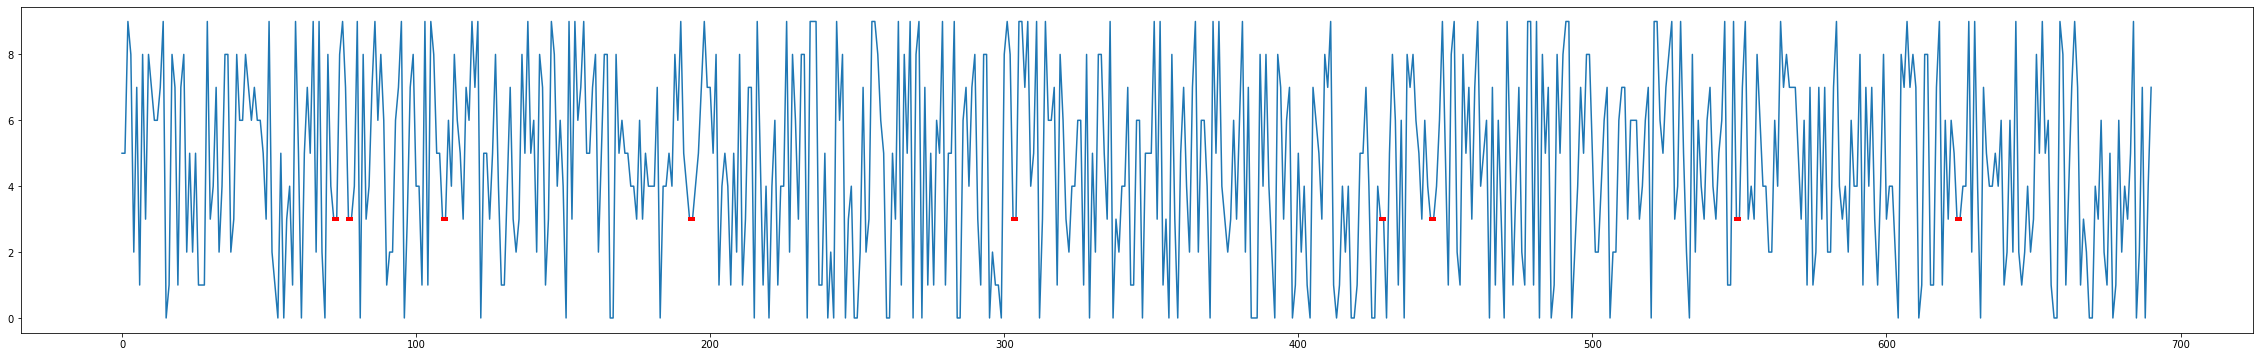

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,6)) 
plt.plot([i for i in range(len(parity))],parity)
for i in range(0,len(occ),len(x)):
  x=occ[i:i+len(x)]
  y=val[i:i+len(x)]
  print("here")
  plt.plot(x,y,color="red",lw=4)
plt.show()

In [0]:
np_ar=np.array(parity)
new_ar=np.where(np_ar%2==0,0,1)
len(new_ar)

981

In [0]:
occ=[]
val=[]
m=input("Enter sequence")
print(m) 
for i in range(1,len(new_ar)):
  test=''.join([str(j) for j in new_ar[i:i+len(m)]])
  if (test==m):
      for k in range(-1,len(m)+1):
        occ.append(k+i)
        val.append(new_ar[k+i])

print(occ)
len(new_ar)
print(val)

Enter sequence1101
1101
[11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28, 28, 29, 30, 31, 32, 33, 68, 69, 70, 71, 72, 73, 80, 81, 82, 83, 84, 85, 90, 91, 92, 93, 94, 95, 107, 108, 109, 110, 111, 112, 126, 127, 128, 129, 130, 131, 139, 140, 141, 142, 143, 144, 142, 143, 144, 145, 146, 147, 155, 156, 157, 158, 159, 160, 244, 245, 246, 247, 248, 249, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 268, 269, 270, 271, 272, 273, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 319, 320, 321, 322, 323, 324, 329, 330, 331, 332, 333, 334, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 347, 348, 349, 350, 351, 352, 354, 355, 356, 357, 358, 359, 364, 365, 366, 367, 368, 369, 388, 389, 390, 391, 392, 393, 412, 413, 414, 415, 416, 417, 415, 416, 417, 418, 419, 420, 418, 419, 420, 421, 422, 423, 440, 441, 442, 443, 444, 445, 465, 466, 467, 468, 469, 470, 504, 505, 506, 507, 508, 509, 517, 518, 519, 520, 521, 522, 541, 542, 543, 544, 545, 546, 559, 560, 561, 562, 5

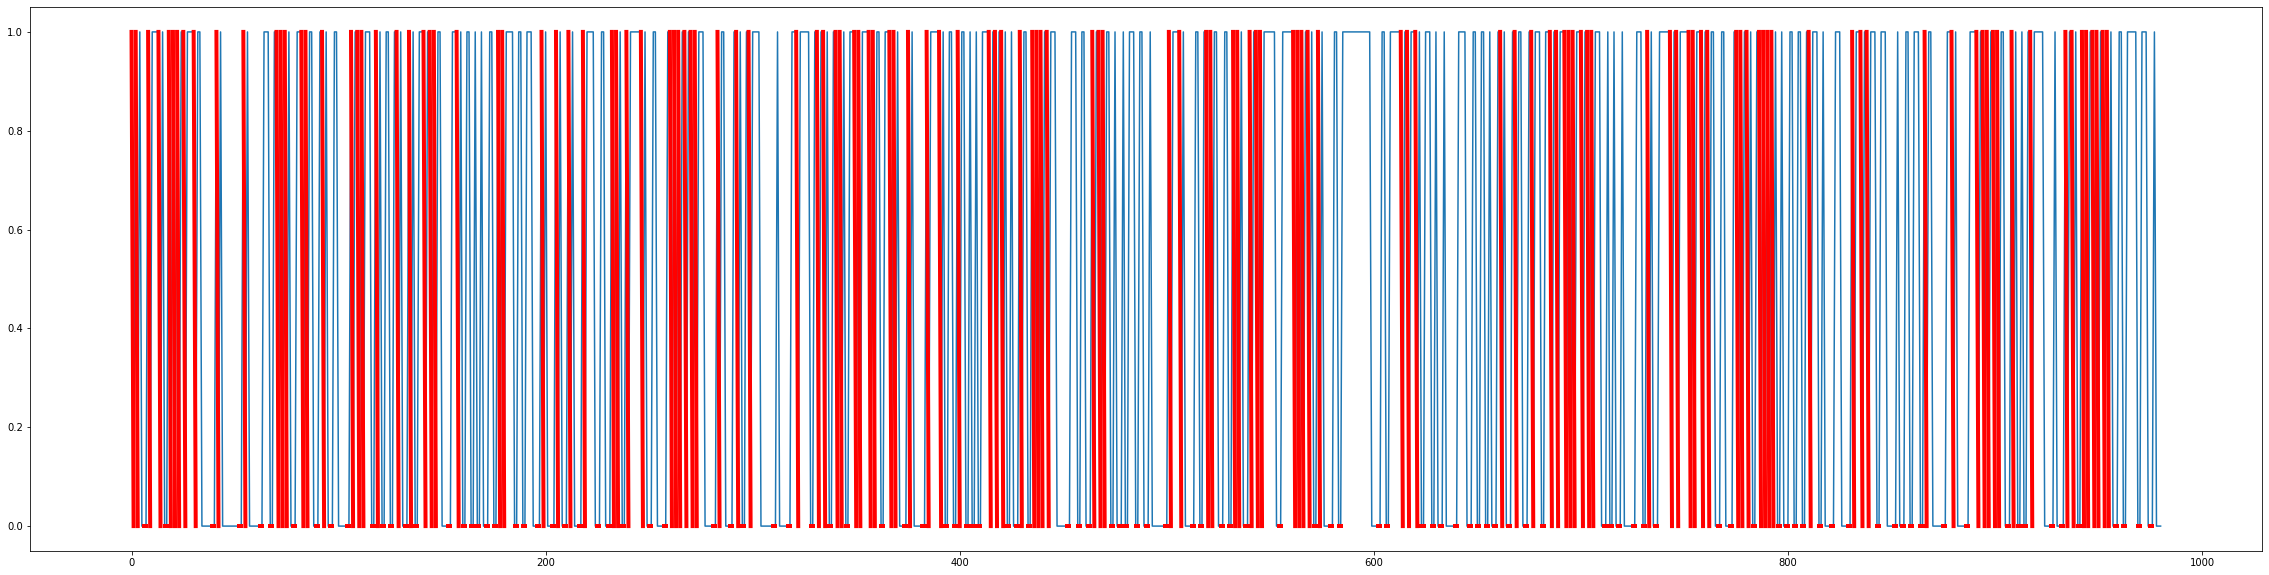

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,10)) 
plt.plot([i for i in range(len(new_ar))],new_ar)
for i in range(0,len(occ),len(m)+2):
  x=occ[i:i+len(m)]
  y=val[i:i+len(m)]
  plt.plot(x,y,color="red",lw=4)
plt.show()

In [0]:
import pandas as pd
import numpy as np
j=pd.DataFrame(zip(time,price,parity),columns=['time','price','parity'])
price=np.array(j.price) 
time=np.array(j.time)
#//m=np.where(k%2==0,0,1)
#m

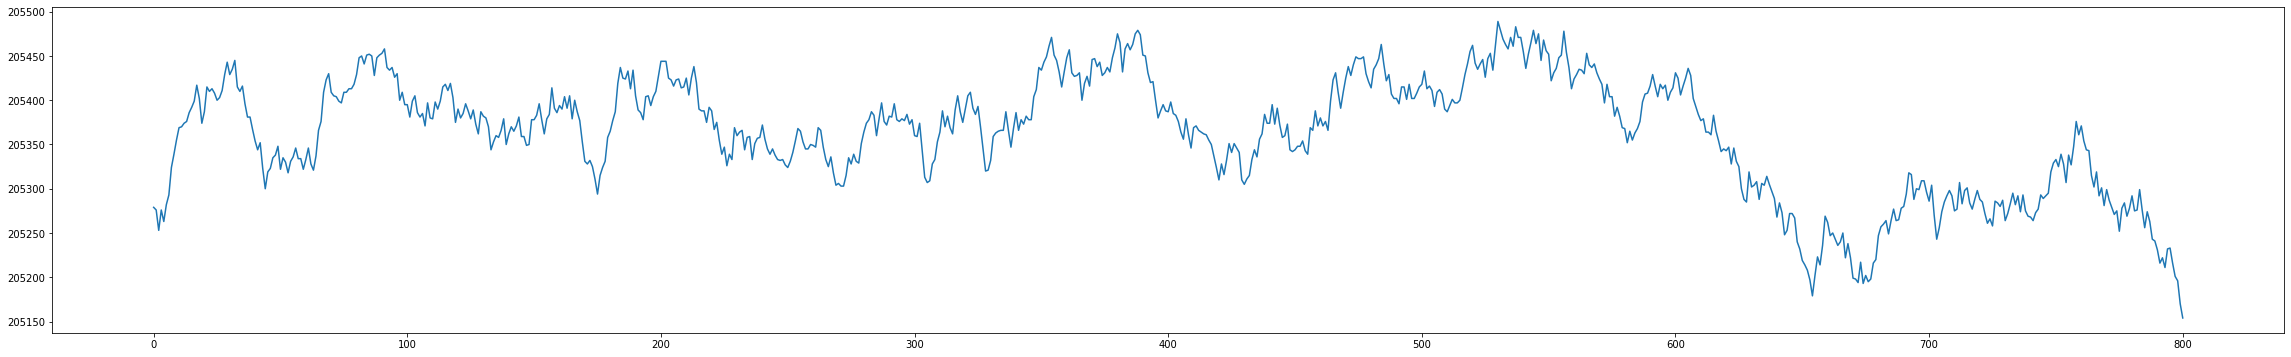

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,6)) 
plt.plot(j.index,price)


In [0]:
split_time = 350
time_train = time[:split_time]
x_train = price[:split_time]
time_valid = time[split_time:]
x_valid = price[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 500
x_train

array([205279, 205276, 205253, 205276, 205263, 205282, 205293, 205324,
       205339, 205355, 205369, 205370, 205374, 205376, 205386, 205392,
       205399, 205417, 205402, 205374, 205387, 205415, 205410, 205413,
       205408, 205400, 205403, 205411, 205429, 205443, 205429, 205435,
       205445, 205415, 205410, 205416, 205396, 205381, 205381, 205367,
       205354, 205344, 205352, 205323, 205300, 205319, 205323, 205335,
       205338, 205348, 205322, 205335, 205330, 205318, 205331, 205336,
       205346, 205334, 205334, 205322, 205333, 205346, 205328, 205321,
       205337, 205366, 205376, 205409, 205423, 205430, 205409, 205405,
       205404, 205399, 205397, 205409, 205409, 205413, 205413, 205418,
       205429, 205448, 205450, 205441, 205451, 205452, 205450, 205428,
       205448, 205451, 205453, 205458, 205437, 205434, 205437, 205426,
       205430, 205400, 205409, 205395, 205395, 205381, 205399, 205405,
       205386, 205381, 205385, 205371, 205397, 205380, 205379, 205398,
      

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0
